# Notebook of the Procom project : Learning physics informed mappings for turbulence multiscale decomposition

**Authors :** Paul Fouilhac, Mouhamed Sow, Éloi Sainte Beuve, Ghazi Abid

In [1]:
pip install -Uq pytorch-lightning lpips

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\kinbr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Parameters

In [4]:
# Data parameters
nb_images = 500 # Maximum = 500
val_size = 0.2
test_size = 0.2
batch_size = 4

# Training parameters
num_training_epochs = 20 #1250
pretrained = False
num_pretrained_epochs = 0

## Loading data

In [5]:
from turbulence.dataset import load_data

image_folder_path = './velocity_images'
train_loader, val_loader, test_loader = load_data(image_folder_path, nb_images, val_size, test_size, batch_size)

## Training

In [ ]:
from turbulence.train import train

pretrained_model_path = f'./turbulence/pretrained/{model_name}_epoch_{num_pretrained_epochs}.ckpt'
train(pretrained_model_path, train_loader, val_loader, epochs=num_training_epochs, pretrained=pretrained)

NameError: name 'train_loader' is not defined

## Testing

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /homes/j25lopez/.local/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


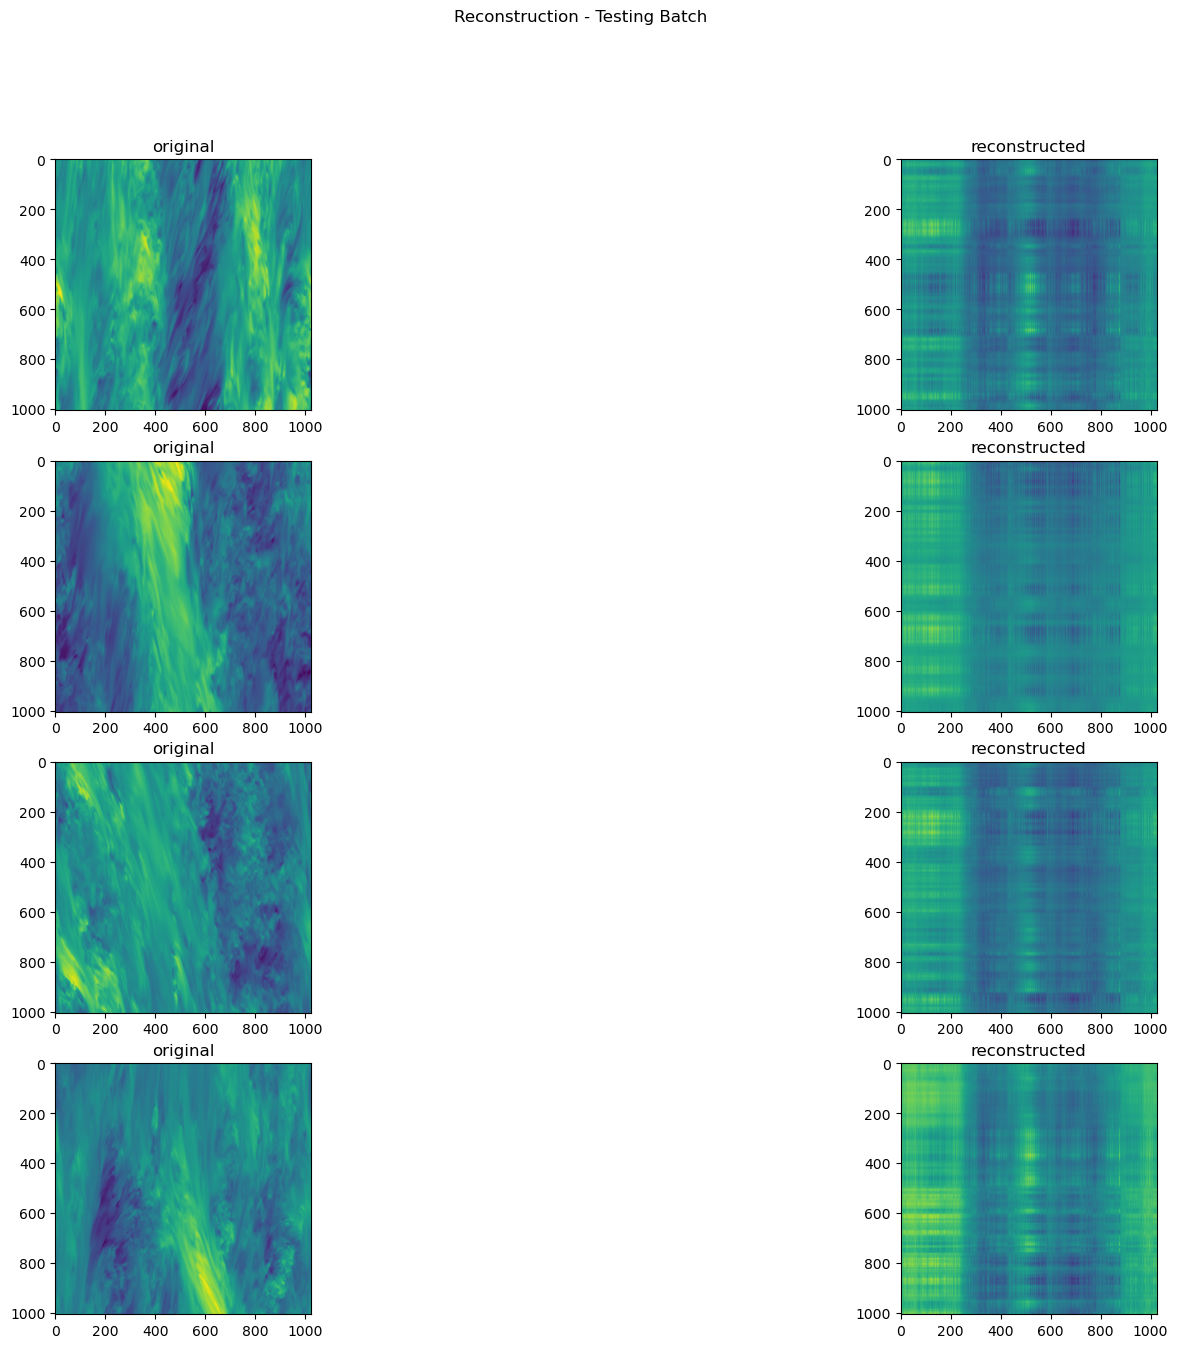

In [17]:
# Load the trained model
from turbulence.utils import plot_reconstruction

from turbulence.network import Turbulence
from turbulence.utils import load_model

model_1 = Turbulence()
trained_model_path = './turbulence/pretrained/spectralLoss_b1e-05_epoch_125.ckpt'
# trained_model_path = './turbulence/pretrained/spectralLoss_b1e-05_epoch_125.ckpt'
load_model(model_1, trained_model_path)

model_1.eval()  # Set the model to evaluation mode
batch = next(iter(test_loader))

plot_reconstruction(model_1, batch)


### Plotting the reconstruction

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/img/effdl-venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/img/effdl-venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /homes/j25lopez/.local/lib/python3.12/site-packages/lpips/weights/v0.1/alex.pth


/homes/j25lopez/.local/lib/python3.12/site-packages/lpips/lpips.py:107: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(model_path, map_locatio

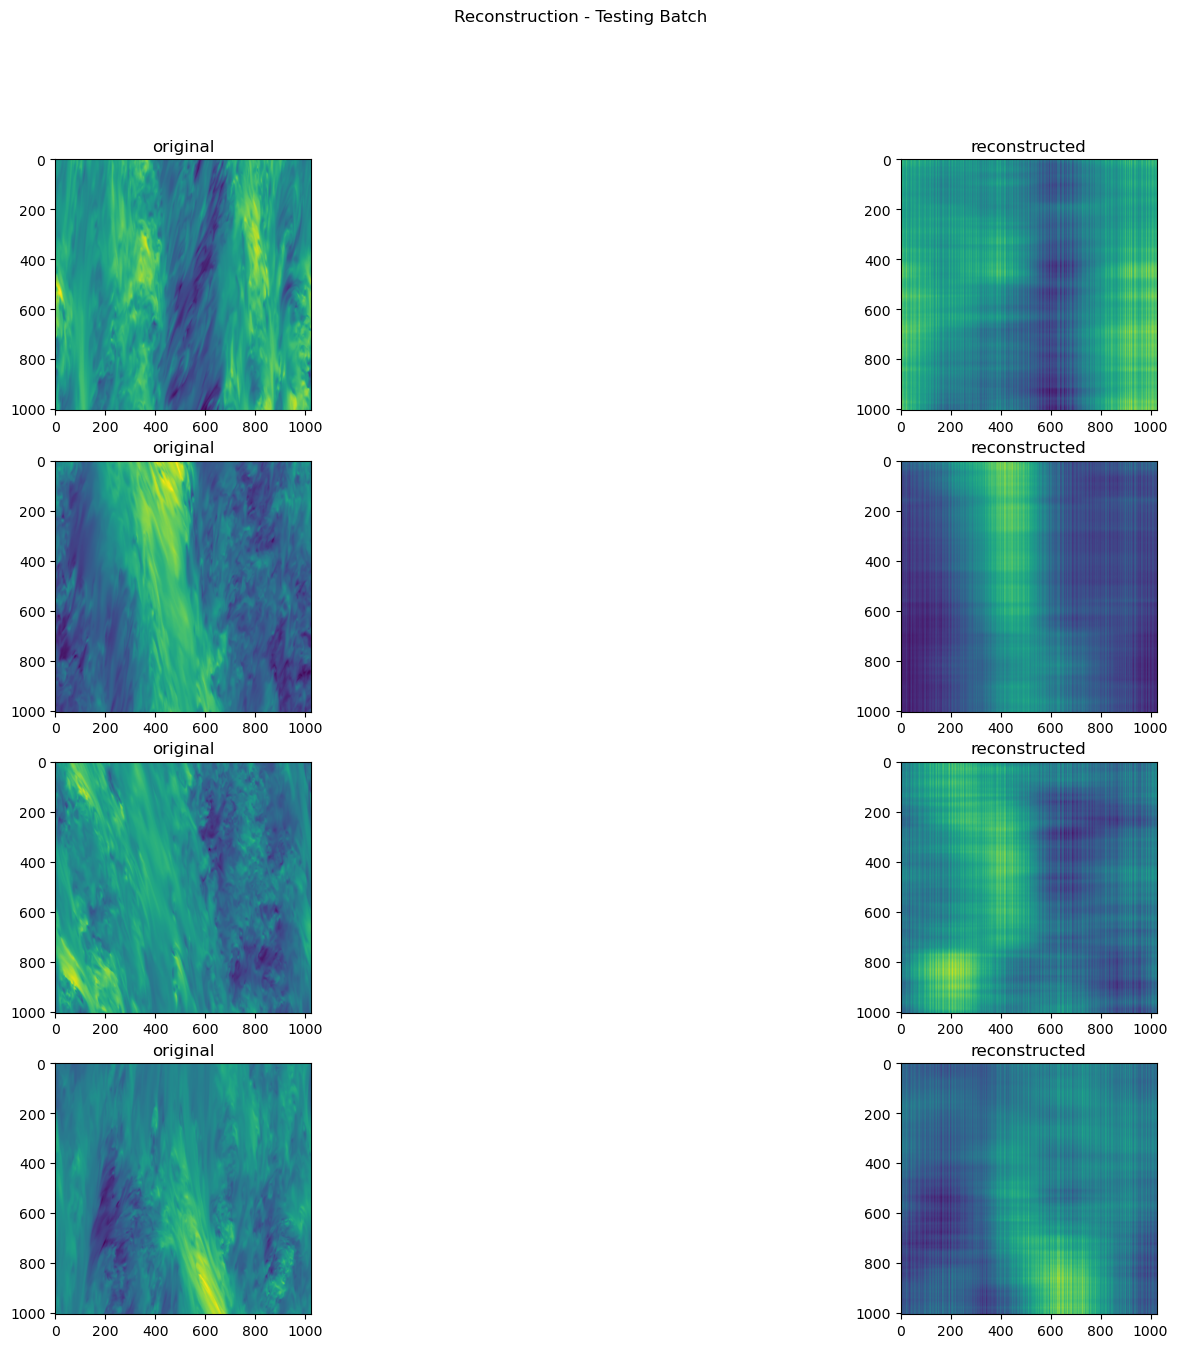

In [19]:
# Load the trained model
from turbulence.utils import plot_reconstruction

from turbulence.network import Turbulence
from turbulence.utils import load_model

model_2 = Turbulence()
trained_model_path = './turbulence/pretrained/lpips-spectralLoss_1e-3.pth'
# trained_model_path = './turbulence/pretrained/spectralLoss_b1e-05_epoch_125.ckpt'
load_model(model_2, trained_model_path)

model_2.eval()  # Set the model to evaluation mode
batch = next(iter(test_loader))

plot_reconstruction(model_2, batch)

### Plot the sepctrums

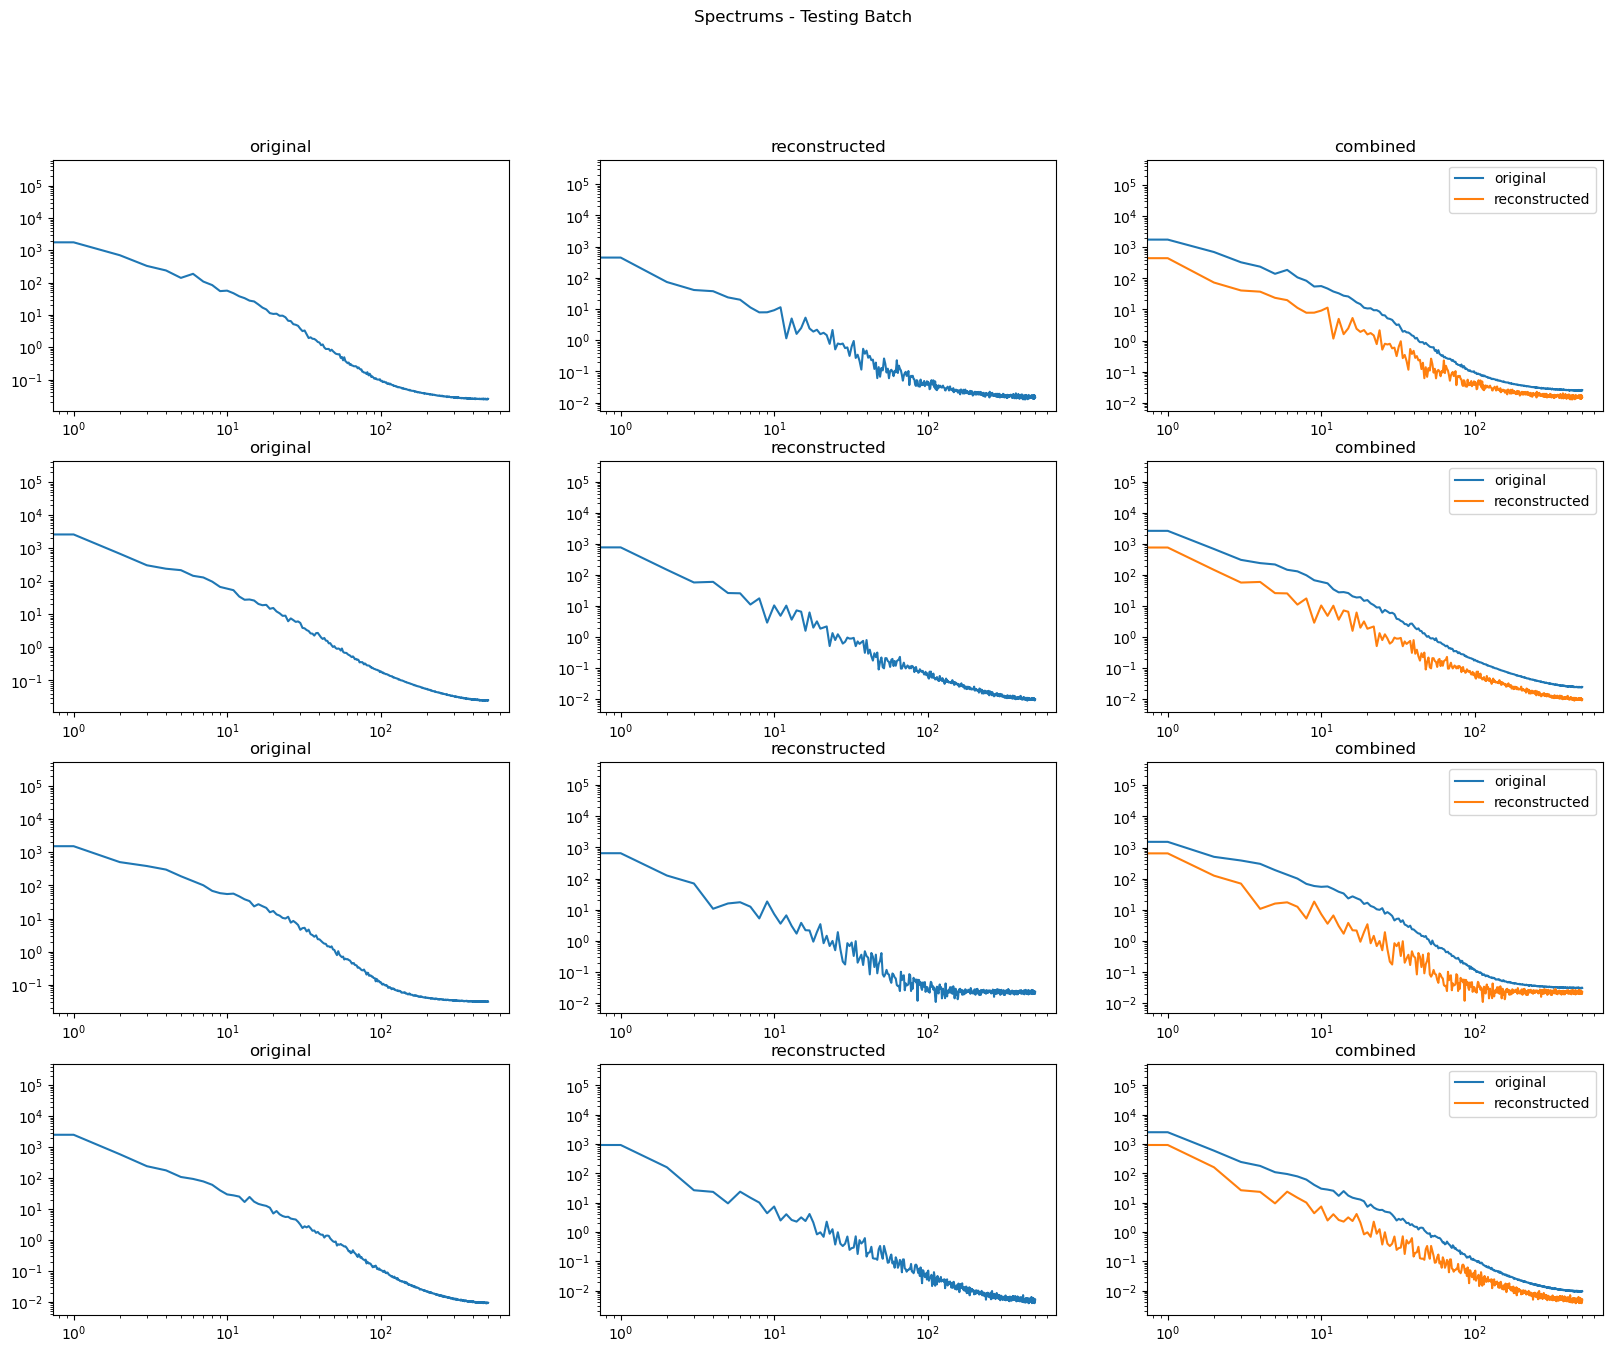

In [13]:
from turbulence.utils import plot_spectrums

plot_spectrums(model, batch)

### Plot the latent space modes amplitude

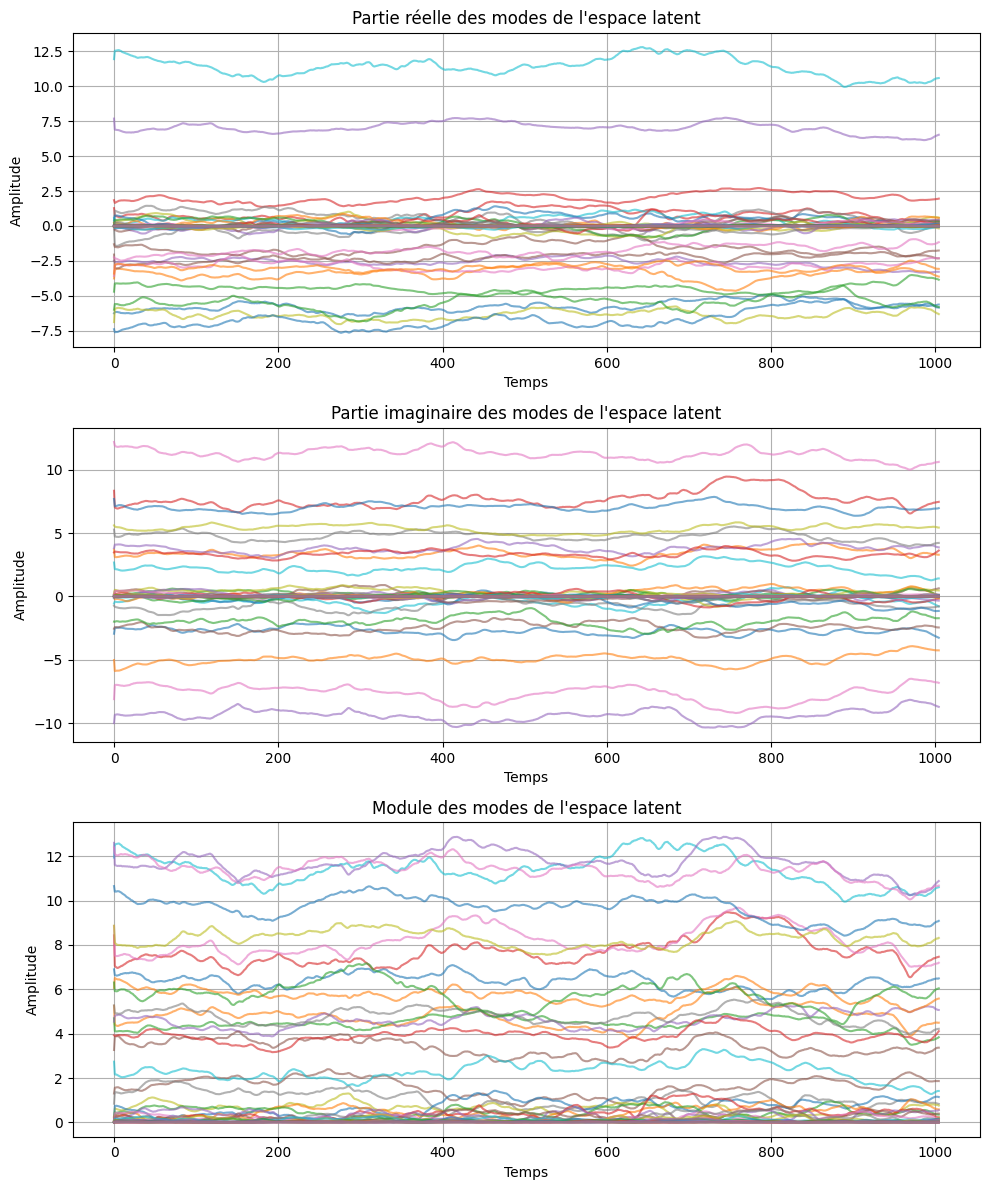

In [11]:
from turbulence.utils import plot_latent_space_mode_amplitude

image = batch[0] # Set the image
plot_latent_space_mode_amplitude(model, image)

### Plot the flatness of the latent space modes

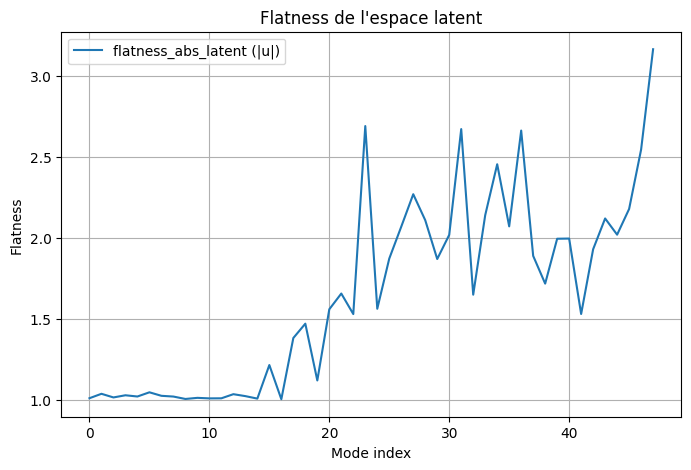

In [12]:
from turbulence.utils import plot_flatness

image = batch[0] # Set the image
plot_flatness(model, image)